In [25]:
import numpy as np
from matplotlib import pyplot as plt
import os
import cv2
import random

In [26]:
training_data=np.load('train_data.npy',allow_pickle=True)

X=[]
y=[]

for features,label in training_data:
    X.append(features)
    y.append(label[0])

X = np.array(X).reshape(-1,224,224,1)
y = np.array(y)
X = X/255

#print(training_data)

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D

In [29]:
model = Sequential()
model.add(Conv2D(64,(3,3),input_shape=X_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(1))                        #SINGLE OUTPUT node
model.add(Activation("sigmoid"))

In [31]:
model.compile(loss="binary_crossentropy" , optimizer="rmsprop" , metrics=['accuracy'])   #optimizer=adam
model.fit(X_train,y_train, batch_size=16 ,verbose=1,epochs=30,validation_data=(X_test,y_test),shuffle=False)

Epoch 1/30
115/115 [==============================] - 138s 1s/step - loss: 0.6101 - accuracy: 0.7661 - val_loss: 0.4930 - val_accuracy: 0.7739
Epoch 2/30
115/115 [==============================] - 123s 1s/step - loss: 0.4266 - accuracy: 0.8308 - val_loss: 0.3024 - val_accuracy: 0.8717
Epoch 3/30
115/115 [==============================] - 121s 1s/step - loss: 0.2469 - accuracy: 0.9048 - val_loss: 0.1767 - val_accuracy: 0.9348
Epoch 4/30
115/115 [==============================] - 119s 1s/step - loss: 0.1606 - accuracy: 0.9467 - val_loss: 0.1192 - val_accuracy: 0.9587
Epoch 5/30
115/115 [==============================] - 127s 1s/step - loss: 0.1102 - accuracy: 0.9657 - val_loss: 0.0727 - val_accuracy: 0.9870
Epoch 6/30
115/115 [==============================] - 134s 1s/step - loss: 0.0790 - accuracy: 0.9701 - val_loss: 0.0662 - val_accuracy: 0.9826
Epoch 7/30
115/115 [==============================] - 130s 1s/step - loss: 0.0455 - accuracy: 0.9848 - val_loss: 0.0542 - val_accuracy: 0.9761

In [32]:
model.save('counterfeit.h5')

Prediction of image:  [[1.]]
Actual label of note:  1


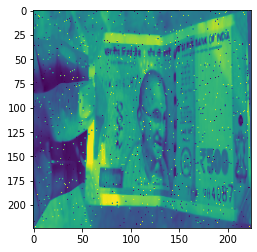

In [33]:
n=2
img=X_test[n]
plt.imshow(img)
input_img = np.expand_dims(img,axis=0)
print("Prediction of image: ",model.predict(input_img))
print("Actual label of note: ",y_test[n])

In [34]:
score = model.evaluate(X_test, y_test, verbose = 0 )
#train_sc= model.evaluate(X_train, y_train, verbose = 0 )
print("Test Score: ", score[0])
print("Test accuracy: ", score[1])

Test Score:  0.01995108649134636
Test accuracy:  0.9956521987915039
